<a href="https://colab.research.google.com/github/manuj8285/DataScientistProject/blob/main/FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the project

The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to predict wheather a patient has a diabeties based on certain diagnostic measurements included in the dataset

# Overview of the project



1.   Problem Statement 
2.   Exploratory Data Analysis
1.   Data Cleaning
      *   Identify Outliers and Missing values
      *   Outliers and Missing values Treatment

      *   Clean Data
 

4.   Model Building

      *   Linear Regression

      *   Logistic Regression




# Problem Statement

The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis

In [ ]:
DataSet = pd.read_csv("/content/diabetes.csv")
DataSet

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
DataSet.shape

(768, 9)

In [ ]:
DataSet.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [ ]:
DataSet.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
DataSet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
DataSet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
DataSet.duplicated().sum()

0

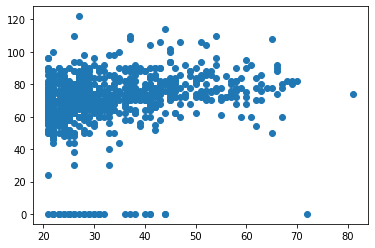

In [ ]:
plt.scatter(DataSet.Age, DataSet.BloodPressure)

# Data Cleaning

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b2cb3490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b2cb3f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52c72cfd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b2cb7a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b2cb7f50>],
 'means': []}

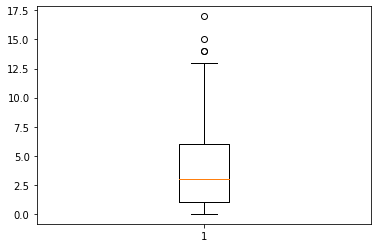

In [ ]:
plt.boxplot(DataSet.Pregnancies)

In Boxplot of pregnancies showing that 13,15,17 pregnancies as a outliers but it is possible to have 17 childs

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b2c0cb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b2c13610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b2c6b410>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b2c18110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b2c18650>],
 'means': []}

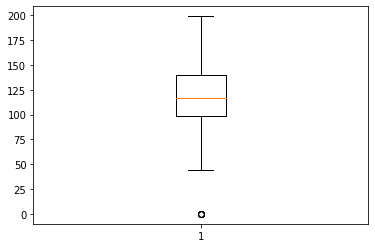

In [ ]:
plt.boxplot(DataSet.Glucose)

In Boxplot of Glucose the outliers shown at 0 which is not possible for anyone to have 0 Glucose. So, removing or replacing it the best choice 

In [ ]:
Zero_values = DataSet['Glucose'] <= 0
Zero_values.sum()

5

Replacing all the 0 values in Glucose variable with the median of the Glucose

In [ ]:
median = DataSet['Glucose'].median()
median

117.0

In [ ]:
DataSet.loc[Zero_values,'Glucose'] = median
Zero_values = DataSet['Glucose'] <= 0
Zero_values.sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b2bee550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b2beefd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b2bc2150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b2bf3ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b2bfa050>],
 'means': []}

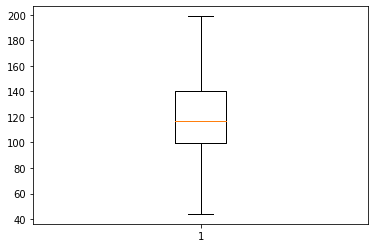

In [ ]:
plt.boxplot(DataSet.Glucose)

After clean Data this is the Boxplot of Glucose

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b2b56590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b2b5c050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b2be7690>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b2b5cb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b2b64090>],
 'means': []}

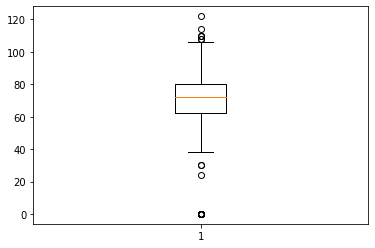

In [ ]:
plt.boxplot(DataSet.BloodPressure)

In boxplot of BloodPressure showing the outliers are above upper quartiles and below lower quartile but in case of above upper quartiles BP is possible but in case of below lower quartiles it is not possible to have 0 BP. So ,removing or replacing it the best choice

In [ ]:
Zero_values_BP = DataSet['BloodPressure'] <= 0
Zero_values_BP.sum()

35

Replacing all the 0 values in BloodPressure variable with the median of the BloodPressure

In [ ]:
median_BP = DataSet['BloodPressure'].median()
median_BP

72.0

In [ ]:
DataSet.loc[Zero_values_BP,'BloodPressure'] = median_BP
Zero_values_BP = DataSet['BloodPressure'] <= 0
Zero_values_BP.sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b2c92610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b2b87090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b2bd1210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b2c4ad10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b2bc9b90>],
 'means': []}

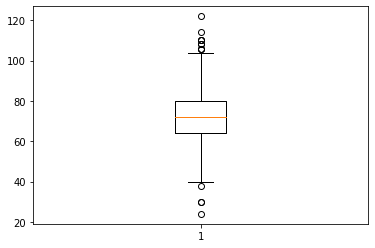

In [ ]:
plt.boxplot(DataSet.BloodPressure)

After clean Data this is the Boxplot of BloodPressure

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b2d461d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b2da6250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b2b6c910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b2d9fe90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b2da2390>],
 'means': []}

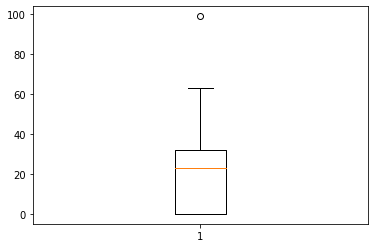

In [ ]:
plt.boxplot(DataSet.SkinThickness)

In boxplot of SkinThickness the outlier is too far from the uper quartile so removing or replacing is the best choice and in there the boxplot is started from 0 and the 0 SkinThickness is not possible so i will replace it by median of the SkinThickness column

In [ ]:
Zero_values_ST = DataSet['SkinThickness'] <= 0
Zero_values_ST.sum()

227

Replacing the outliers and the Zero values with the median of the SKinThickness column

In [ ]:
median_ST = DataSet['SkinThickness'].median()
median_ST

23.0

In [ ]:
DataSet.loc[Zero_values_ST,'SkinThickness'] = median_ST
Zero_values_ST = DataSet['SkinThickness'] <= 0
Zero_values_ST.sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b2a4e390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b2a4ee10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b2a47dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b2a549d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b2a54f10>],
 'means': []}

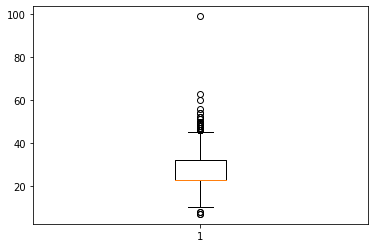

In [ ]:
plt.boxplot(DataSet.SkinThickness)

After clean Data this is the Boxplot of SkinThickness

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b29bc710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b29c41d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b2a6ab90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b29c4c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b29cc210>],
 'means': []}

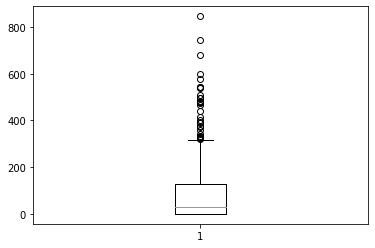

In [ ]:
plt.boxplot(DataSet.Insulin)

In boxplot of Insulin all the outliers are close to each other so i am not considering them as a outliers but in Insulin also it started from 0 which is not possible

In [ ]:
Zero_values_IN = DataSet['Insulin'] <= 0
Zero_values_IN.sum()

374

So, i will replace all the zeros with the median of the Insulin Column

In [ ]:
median_IN = DataSet['Insulin'].median()
median_IN

30.5

In [ ]:
DataSet.loc[Zero_values_IN,'Insulin'] = median_IN
Zero_values_IN = DataSet['Insulin'] <= 0
Zero_values_IN.sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b29a1b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b29a7610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b29e3450>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b29b0110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b29b0650>],
 'means': []}

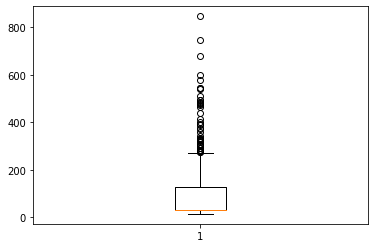

In [ ]:
plt.boxplot(DataSet.Insulin)

After clean Data this is the Boxplot of Insulin

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b290ee10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b29138d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b2955650>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b29193d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b2919910>],
 'means': []}

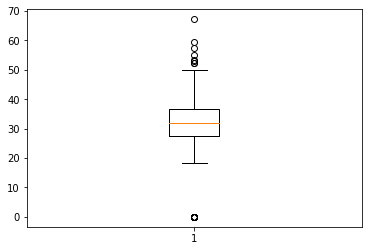

In [ ]:
plt.boxplot(DataSet.BMI)

In the boxplot of BMI showing the outliers which is above upper quartile are quite fluctuating so i will not consider them as a outliers but in case of belove lower quartile BMI is 0 which is not possible so i will replace it with the median of the BMI column

In [ ]:
Zero_values_BMI = DataSet['BMI'] <= 0
Zero_values_BMI.sum()

11

In [ ]:
median_BMI = DataSet['BMI'].median()
median_BMI

32.0

In [ ]:
DataSet.loc[Zero_values_BMI,'BMI'] = median_BMI
Zero_values_BMI = DataSet['BMI'] <= 0
Zero_values_BMI.sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b288a790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b2891250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b28d2310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b2891d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b2899290>],
 'means': []}

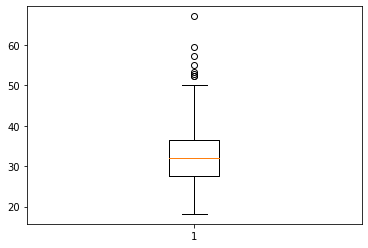

In [ ]:
plt.boxplot(DataSet.BMI)

After clean Data this is the Boxplot of BMI

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b2870ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b2876590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b28aaed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b27ff090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b27ff5d0>],
 'means': []}

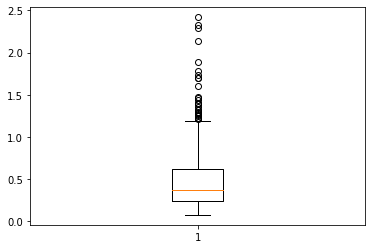

In [ ]:
plt.boxplot(DataSet.DiabetesPedigreeFunction)

In boxplot of DiabetesPedigreeFunction showing the outliers but they are quite fluctuating and it can vary based on the family history.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52b27e2490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f52b27e2f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f52b28156d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f52b27eaa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f52b27eaf50>],
 'means': []}

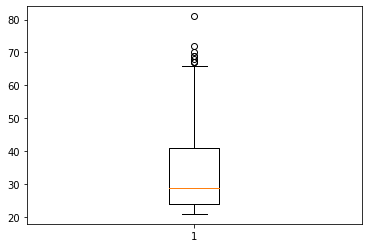

In [ ]:
plt.boxplot(DataSet.Age)

In the boxplot of age is showing some outlires but it is possible to have the people with that age so i will not remove them

In [ ]:
DataSet.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
DataSet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
DataSet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Finding the correlation between Pregnancies and Age

In [ ]:
np.corrcoef(DataSet.Pregnancies,DataSet.Age)

array([[1.        , 0.54434123],
       [0.54434123, 1.        ]])

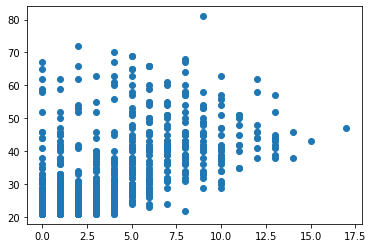

In [ ]:
plt.scatter(DataSet.Pregnancies,DataSet.Age)

Finding the correlation between Outcome and Glucose

In [ ]:
np.corrcoef(DataSet.Glucose,DataSet.Outcome)

array([[1.       , 0.4927824],
       [0.4927824, 1.       ]])

There is no correlation Between the variables 

# Modeling

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(DataSet[["Pregnancies"]],DataSet[["Age"]])

LinearRegression()

In [ ]:
lr.coef_

array([[1.89981617]])

In [ ]:
lr.intercept_

array([25.9359933])

In [ ]:
Model = sm.ols(formula='Outcome ~ Glucose', data=DataSet)

In [ ]:
Fitted = Model.fit()
Fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     245.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.13e-48
Time:                        16:51:59   Log-Likelihood:                -413.84
No. Observations:                 768   AIC:                             831.7
Df Residuals:                     766   BIC:                             841.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5904      0.062     -9.557      0.000      -0.712      -0.469
Glucose        0.0077      0.000     15.674      0.000       0.007       0.009
==============================================================================
Omnibus:                       70.101   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.577
Skew:                           0.483   Prob(JB):                     7.69e-11
Kurtosis:                       2.278   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can not use the Regression model here because R-Squared is low

In [ ]:
Model1 = sm.ols(formula='Outcome ~ Glucose+Age+BMI+BloodPressure+Pregnancies+SkinThickness+DiabetesPedigreeFunction', data=DataSet)

In [ ]:
Fitted1 = Model1.fit()
Fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     51.28
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           7.36e-60
Time:                        16:52:08   Log-Likelihood:                -372.12
No. Observations:                 768   AIC:                             760.2
Df Residuals:                     760   BIC:                             797.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.0196      0.104     -9.815      0.000      -1.223      -0.816
Glucose                      0.0064      0.001     12.621      0.000       0.005       0.007
Age                          0.0021      0.002      1.366      0.172      -0.001       0.005
BMI                          0.0150      0.003      5.772      0.000       0.010       0.020
BloodPressure               -0.0011      0.001     -0.874      0.382      -0.004       0.001
Pregnancies                  0.0207      0.005      4.099      0.000       0.011       0.031
SkinThickness               -0.0008      0.002     -0.433      0.665      -0.004       0.003
DiabetesPedigreeFunction     0.1297      0.044      2.942      0.003       0.043       0.216
==============================================================================
Omnibus:                       30.938   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.516
Skew:                           0.315   Prob(JB):                     1.29e-05
Kurtosis:                       2.445   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we can not use the Linear Regression because r-Squared and Adjusted R-Squared is very low because of that it is not good fit for the Linear Regression  model 

Logistic Regression

In [ ]:
X = DataSet.iloc[:,:-1]
y = DataSet.iloc[:,-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=21)

In [ ]:
log_reg = LogisticRegression()
log_param = {"penalty":['l1', 'l2', 'elasticnet', 'none'],"C":[0.8,1.0,1.2,1.4],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],"max_iter":[100,150,200],"multi_class":["ovr"]}
grid_search_log_reg = GridSearchCV(log_reg,param_grid=log_param,cv=5)
grid_search_log_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.8, 1.0, 1.2, 1.4], 'max_iter': [100, 150, 200],
                         'multi_class': ['ovr'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
grid_search_log_reg.best_params_

{'C': 1.0,
 'max_iter': 100,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'saga'}

In [ ]:
grid_search_log_reg.best_score_

0.7833399973343995

In [ ]:
y_pred=grid_search_log_reg.predict(X_test)

In [ ]:
score = accuracy_score(y_pred,y_test)
score

0.7467532467532467

In [ ]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.89      0.74      0.81       113\n           1       0.52      0.76      0.61        41\n\n    accuracy                           0.75       154\n   macro avg       0.71      0.75      0.71       154\nweighted avg       0.79      0.75      0.76       154\n'

In [ ]:
from sklearn import metrics
final = metrics.confusion_matrix(y_test,y_pred)
final

array([[84, 10],
       [29, 31]])